# STOR 520 Final Project
---
## Data Analysis for Chicago Traffic Crashes
### By: Kayla Casey, Wally Lutz, and Nick Longueira

---
## Part One: EDA and Cleaning

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import HeatMap
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv(r"Traffic_Crashes.csv")
print(df.head())
print(df.info())

                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...              NaN   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...              NaN   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  08/18/2023 12:50:00 PM                  15                  OTHER   
1  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
2  08/18/2023 05:58:00 PM                  30            NO CONTROLS   
3  11/26/2019 08:38:00 AM                  25            NO CONTROLS   
4  08/18/2023 10:45:00 AM                  20            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION LIGHTING_CONDITION  \
0  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   


---
### Injury analysis by LANE_CNT

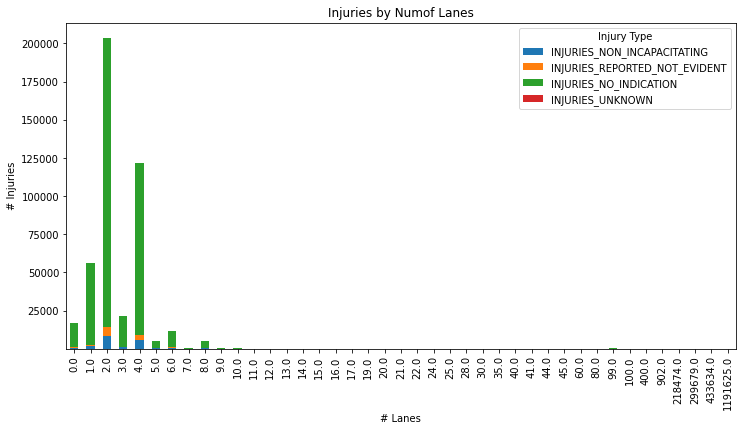

In [85]:
injuries_by_lanes = df.groupby('LANE_CNT')[['INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']].sum()
injuries_by_lanes.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Injuries by Numof Lanes')
plt.xlabel('# Lanes')
plt.ylabel('# Injuries')
plt.legend(title='Injury Type')
plt.show()

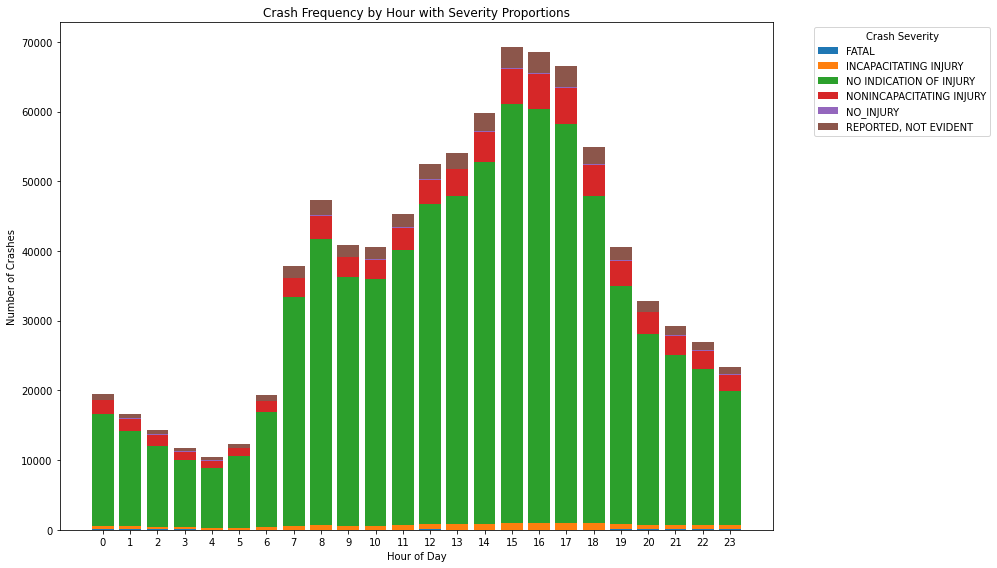

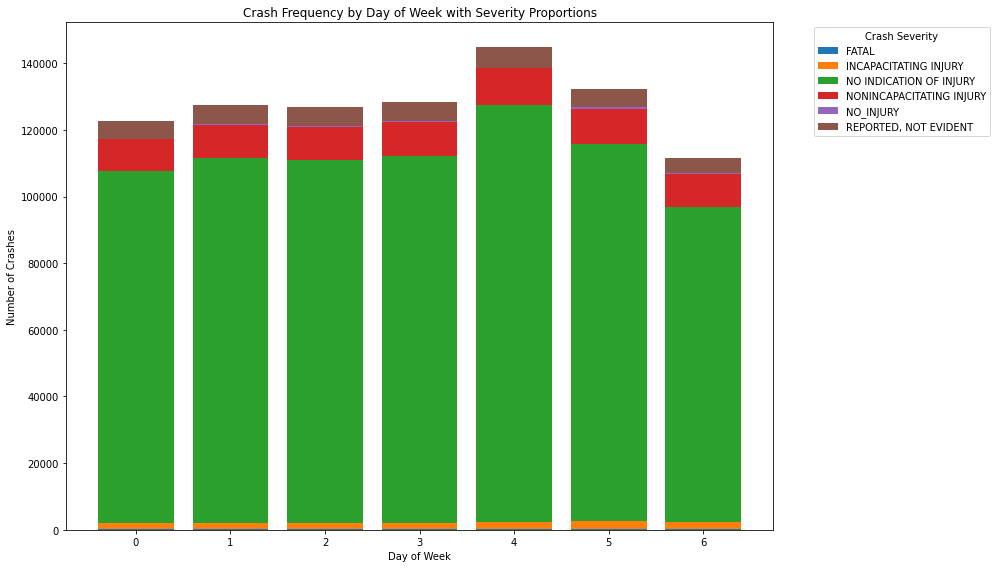

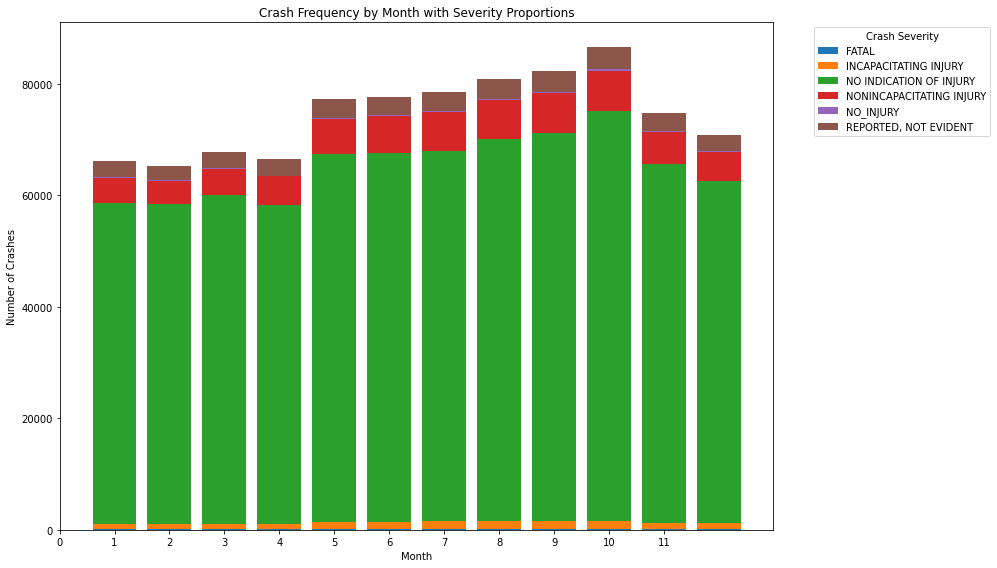

In [86]:
traffic_crashes = pd.read_csv('Traffic_Crashes.csv')

traffic_crashes['CRASH_DATE'] = pd.to_datetime(traffic_crashes['CRASH_DATE'], errors='coerce')
traffic_crashes['DATE_POLICE_NOTIFIED'] = pd.to_datetime(traffic_crashes['DATE_POLICE_NOTIFIED'], errors='coerce')

traffic_crashes['WEATHER_CONDITION'] = traffic_crashes['WEATHER_CONDITION'].fillna('UNKNOWN')
traffic_crashes['ROADWAY_SURFACE_COND'] = traffic_crashes['ROADWAY_SURFACE_COND'].fillna('UNKNOWN')
traffic_crashes['LIGHTING_CONDITION'] = traffic_crashes['LIGHTING_CONDITION'].fillna('UNKNOWN')
traffic_crashes['MOST_SEVERE_INJURY'] = traffic_crashes['MOST_SEVERE_INJURY'].fillna('NO_INJURY')

traffic_crashes['CRASH_HOUR'] = traffic_crashes['CRASH_DATE'].dt.hour
traffic_crashes['CRASH_DAY_OF_WEEK'] = traffic_crashes['CRASH_DATE'].dt.dayofweek  # 0 = Monday, 6 = Sunday
traffic_crashes['CRASH_MONTH'] = traffic_crashes['CRASH_DATE'].dt.month

severity_counts = traffic_crashes.groupby(['CRASH_HOUR', 'MOST_SEVERE_INJURY']).size().unstack(fill_value=0)
severity_proportions = severity_counts.div(severity_counts.sum(axis=1), axis=0)  # Proportions by hour
plt.figure(figsize=(14, 8))
bottom = None
for severity in severity_proportions.columns:
    if bottom is None:
        bottom = severity_proportions[severity]
        plt.bar(severity_proportions.index, severity_proportions[severity] * severity_counts.sum(axis=1), 
                label=severity)
    else:
        plt.bar(severity_proportions.index, severity_proportions[severity] * severity_counts.sum(axis=1), 
                bottom=bottom * severity_counts.sum(axis=1), label=severity)
        bottom += severity_proportions[severity]
plt.title('Crash Frequency by Hour with Severity Proportions')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(24))  # Ensure all hours are shown
plt.legend(title='Crash Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analyze frequency of crashes by day of the week
severity_counts = traffic_crashes.groupby(['CRASH_DAY_OF_WEEK', 'MOST_SEVERE_INJURY']).size().unstack(fill_value=0)
severity_proportions = severity_counts.div(severity_counts.sum(axis=1), axis=0)  # Proportions by hour
plt.figure(figsize=(14, 8))
bottom = None
for severity in severity_proportions.columns:
    if bottom is None:
        bottom = severity_proportions[severity]
        plt.bar(severity_proportions.index, severity_proportions[severity] * severity_counts.sum(axis=1), 
                label=severity)
    else:
        plt.bar(severity_proportions.index, severity_proportions[severity] * severity_counts.sum(axis=1), 
                bottom=bottom * severity_counts.sum(axis=1), label=severity)
        bottom += severity_proportions[severity]
plt.title('Crash Frequency by Day of Week with Severity Proportions')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crashes')
plt.xticks(range(7))  # Ensure all hours are shown
plt.legend(title='Crash Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analyze frequency of crashes by month
severity_counts = traffic_crashes.groupby(['CRASH_MONTH', 'MOST_SEVERE_INJURY']).size().unstack(fill_value=0)
severity_proportions = severity_counts.div(severity_counts.sum(axis=1), axis=0)  # Proportions by hour
plt.figure(figsize=(14, 8))
bottom = None
for severity in severity_proportions.columns:
    if bottom is None:
        bottom = severity_proportions[severity]
        plt.bar(severity_proportions.index, severity_proportions[severity] * severity_counts.sum(axis=1), 
                label=severity)
    else:
        plt.bar(severity_proportions.index, severity_proportions[severity] * severity_counts.sum(axis=1), 
                bottom=bottom * severity_counts.sum(axis=1), label=severity)
        bottom += severity_proportions[severity]
plt.title('Crash Frequency by Month with Severity Proportions')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(range(12))  # Ensure all hours are shown
plt.legend(title='Crash Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/qv/24rfc9sd64q3pt384r307xdw0000gn/T/ipykernel_35108/2823471874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cause_counts.index, x=cause_counts.values, palette='viridis')


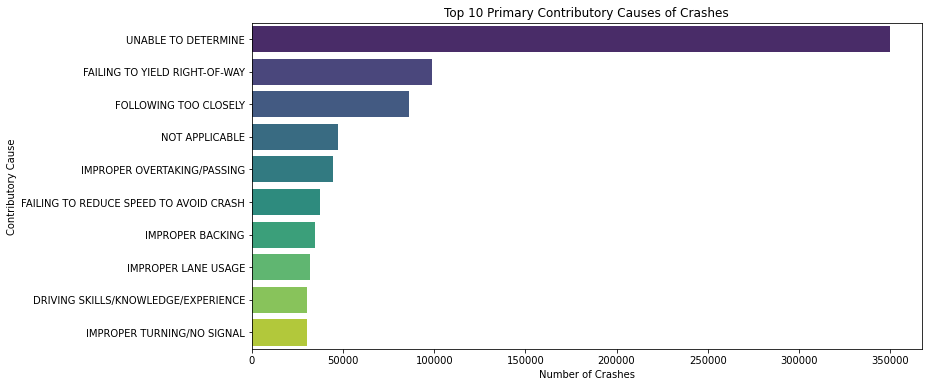

In [87]:
plt.figure(figsize=(12, 6))
cause_counts = traffic_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(10)
sns.barplot(y=cause_counts.index, x=cause_counts.values, palette='viridis')
plt.title('Top 10 Primary Contributory Causes of Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Contributory Cause')
plt.show()

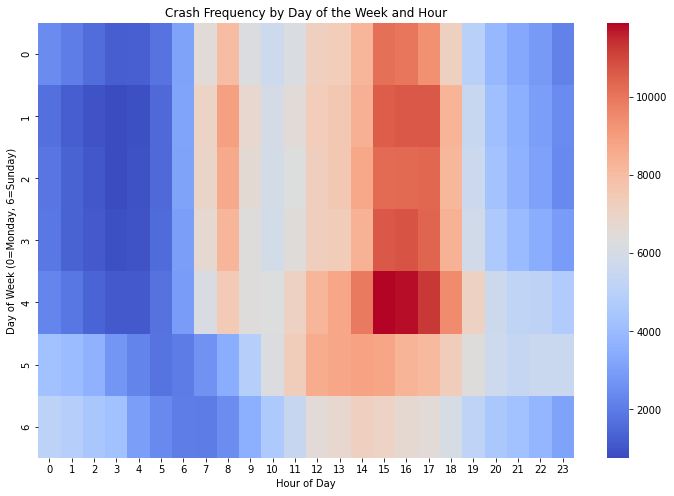

In [94]:
heatmap_data = traffic_crashes.groupby(['CRASH_DAY_OF_WEEK', 'CRASH_HOUR']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Crash Frequency by Day of the Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Monday, 6=Sunday)')
plt.show()

**The HTML for this folium heatmap below will be included in our submission**

In [89]:
data = pd.read_csv("Traffic_Crashes.csv")

df['HIT_AND_RUN_I'] = df['HIT_AND_RUN_I'].fillna('N').replace('', 'N')
data['HIT_AND_RUN_I'] = data['HIT_AND_RUN_I'].fillna('N').map({'Y': 1, 'N': 0})

filtered_data = data[
    (data['LIGHTING_CONDITION'].isin(['DAYLIGHT', 'DUSK', 'DARKNESS'])) &
    (data['HIT_AND_RUN_I'] == 1)
]

if 'LATITUDE' in filtered_data.columns and 'LONGITUDE' in filtered_data.columns:
    filtered_data = filtered_data.dropna(subset=['LATITUDE', 'LONGITUDE'])

m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

lighting_conditions = ['DAYLIGHT', 'DUSK', 'DARKNESS']
for condition in lighting_conditions:
    condition_data = filtered_data[filtered_data['LIGHTING_CONDITION'] == condition]
    heat_data = condition_data[['LATITUDE', 'LONGITUDE']].values.tolist()
    HeatMap(heat_data, name=f'Heatmap ({condition})', radius=10).add_to(m)

folium.LayerControl().add_to(m)

m.save("chicago_hit_and_run_density.html")
print("Map has been saved as 'chicago_hit_and_run_density.html'.")


Map has been saved as 'chicago_hit_and_run_density.html'.


---
## Data Cleaning
For data cleaning, we used various techniques such as one hot encoding, removing redundent columns, and converting na values to binomial variables or removing them. More information is in the writeup.

In [120]:
df = pd.read_csv(r"Traffic_Crashes.csv")
df = df.drop(columns=['LANE_CNT','CRASH_RECORD_ID','CRASH_DATE_EST_I','CRASH_DATE','DATE_POLICE_NOTIFIED','STREET_NO','STREET_NAME','BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I', 
                      'STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','NUM_UNITS','LATITUDE','LONGITUDE','LOCATION'])
df['HIT_AND_RUN_I'] = df['HIT_AND_RUN_I'].fillna('N').replace('', 'N')

df['HIT_AND_RUN_I'] = df['HIT_AND_RUN_I'].map({'Y': 1, 'N': 0})

In [121]:
def clean_data(df, target_col):
    df = df.dropna()  
    df = pd.get_dummies(df, drop_first=True)  
    y = df[target_col]  
    X = df.drop(columns=[target_col]) 
    return X, y

In [122]:
df_sampled = df.sample(frac=0.1, random_state=42)  
X, y = clean_data(df_sampled, target_col='HIT_AND_RUN_I')

---
# Q1: Can we predict if car crashes in the City of Chicago will be a hit and run incident based on crash conditions?

## Lasso Feature Selection

In [123]:
def lasso_feature_selection(X, y, alpha=0.01):
    lasso = LassoCV(cv=5, random_state=42).fit(X, y)
    selected_features = X.columns[lasso.coef_ != 0]
    return selected_features

selected_features = lasso_feature_selection(X, y)
print(selected_features)

/Users/kaylacasey/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00773992292035075, tolerance: 0.003602162162162165
  model = cd_fast.enet_coordinate_descent_gram(


Index(['INJURIES_TOTAL', 'CRASH_HOUR', 'CRASH_MONTH'], dtype='object')


---
## Logistic Regression

              precision    recall  f1-score   support

           0       0.72      0.63      0.67     37493
           1       0.34      0.44      0.38     16176

    accuracy                           0.57     53669
   macro avg       0.53      0.53      0.53     53669
weighted avg       0.61      0.57      0.59     53669

Accuracy: 0.5725465352438093
Logistic Regression MSE: 0.24915494480059835


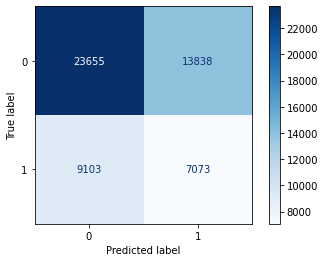

In [124]:
features = ['POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'CRASH_MONTH']
data = df[features + ['HIT_AND_RUN_I']].dropna()
sampled_df = data.sample(frac=0.2, random_state=42)
sampled_df = sampled_df.reset_index(drop=True)
X, y = clean_data(sampled_df, target_col='HIT_AND_RUN_I')

X = sampled_df.drop('HIT_AND_RUN_I', axis=1)
y = sampled_df['HIT_AND_RUN_I']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Blues')

y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]  
mse_log_reg = mean_squared_error(y_test, y_prob_log_reg)
print("Logistic Regression MSE:", mse_log_reg)

In [125]:
# L1 Regularization
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
l1_scores = cross_val_score(log_reg_l1, X, y, cv=5, scoring='accuracy')
print("L1 Cross-Validation Accuracy:", l1_scores.mean())

# L2 Regularization 
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
l2_scores = cross_val_score(log_reg_l2, X, y, cv=5, scoring='accuracy')
print("L2 Cross-Validation Accuracy:", l2_scores.mean())

L1 Cross-Validation Accuracy: 0.6989222668108372
L2 Cross-Validation Accuracy: 0.6989222668108372


In [126]:
log_reg_l1.fit(X_train, y_train)
y_pred_l1 = log_reg_l1.predict(X_test)
test_accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print("L1 Regularization Test Accuracy:", test_accuracy_l1)

log_reg_l2.fit(X_train, y_train)
y_pred_l2 = log_reg_l2.predict(X_test)
test_accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print("L2 Regularization Test Accuracy:", test_accuracy_l2)

L1 Regularization Test Accuracy: 0.6985969554118765
L2 Regularization Test Accuracy: 0.6985969554118765


Logistic Regression AUC-ROC: 0.5303113768839883


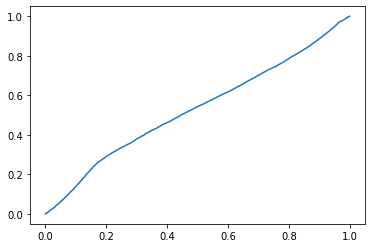

In [127]:
# AUC-ROC
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]  # probabilities for the positive class
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
print("Logistic Regression AUC-ROC:", roc_auc_log_reg)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_log_reg)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')

---
## Decision Trees

In [128]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))
tree_test_accuracy = accuracy_score(y_test, y_pred_tree)
print(tree_test_accuracy)

              precision    recall  f1-score   support

           0       0.70      0.99      0.82     37493
           1       0.58      0.02      0.05     16176

    accuracy                           0.70     53669
   macro avg       0.64      0.51      0.43     53669
weighted avg       0.67      0.70      0.59     53669

0.7006838212003205


In [129]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
tree_test_accuracy = accuracy_score(y_test, y_pred_tree)

tree_cv_scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
print("Decision Tree Test Accuracy:", tree_test_accuracy)
print("Decision Tree Cross-Validation Accuracy:", tree_cv_scores.mean())

Decision Tree Test Accuracy: 0.7006838212003205
Decision Tree Cross-Validation Accuracy: 0.7005153896200735


In [130]:
tree_pruned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
tree_scores = cross_val_score(tree_pruned, X, y, cv=5, scoring='accuracy')
print("Pruned Decision Tree Cross-Validation Accuracy:", tree_scores.mean())

Pruned Decision Tree Cross-Validation Accuracy: 0.7005153896200735


Decision Tree AUC-ROC: 0.5800398212480047


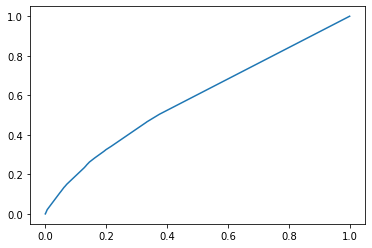

In [131]:
y_prob_tree = tree.predict_proba(X_test)[:, 1] 
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)
print("Decision Tree AUC-ROC:", roc_auc_tree)

fpr, tpr, _ = roc_curve(y_test, y_prob_tree)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')

---
## Random Forest

In [133]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", rf_test_accuracy)

              precision    recall  f1-score   support

           0       0.73      0.72      0.73     37493
           1       0.38      0.39      0.39     16176

    accuracy                           0.62     53669
   macro avg       0.56      0.56      0.56     53669
weighted avg       0.63      0.62      0.63     53669

Random Forest Test Accuracy: 0.6235815834094169


In [110]:
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)

rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print("Random Forest Test Accuracy:", rf_test_accuracy)
print("Random Forest Cross-Validation Accuracy:", rf_cv_scores.mean())

Random Forest Test Accuracy: 0.6240101362052581
Random Forest Cross-Validation Accuracy: 0.6203282615509618


Random Forest AUC-ROC: 0.5661325796641288


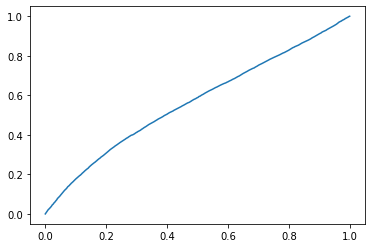

In [134]:
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("Random Forest AUC-ROC:", roc_auc_rf)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

In [ ]:
### This is code we wrote to find better parameters for random forest

# hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Grid Search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

---
## Neural Network

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# build neural network
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Neural Network Accuracy:", accuracy)

/Users/kaylacasey/Library/Python/3.10/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 2s 432us/step - accuracy: 0.6885 - loss: 0.6138 - val_accuracy: 0.6973 - val_loss: 0.6011
Epoch 2/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step - accuracy: 0.6982 - loss: 0.6023 - val_accuracy: 0.6988 - val_loss: 0.6012
Epoch 3/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.7005 - loss: 0.5997 - val_accuracy: 0.6989 - val_loss: 0.6002
Epoch 4/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - accuracy: 0.6991 - loss: 0.6001 - val_accuracy: 0.6975 - val_loss: 0.6010
Epoch 5/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - accuracy: 0.7009 - loss: 0.5998 - val_accuracy: 0.6997 - val_loss: 0.6005
Epoch 6/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.7004 - loss: 0.5992 - val_accuracy: 0.6984 - val_loss: 0.6002
Epoch 7/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - accuracy: 0.7003 - loss: 0.5998 - val_accuracy: 0.6986 - val_loss: 0.5997
Epoch 8/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.7009 -

In [136]:
# Neural network with L2 regularization
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=l2(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Neural Network with L2 Regularization Accuracy:", accuracy)

Epoch 1/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 2s 412us/step - accuracy: 0.6770 - loss: 0.6853 - val_accuracy: 0.6983 - val_loss: 0.6115
Epoch 2/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.6985 - loss: 0.6111 - val_accuracy: 0.6983 - val_loss: 0.6099
Epoch 3/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.6988 - loss: 0.6094 - val_accuracy: 0.6983 - val_loss: 0.6076
Epoch 4/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - accuracy: 0.6988 - loss: 0.6069 - val_accuracy: 0.6981 - val_loss: 0.6067
Epoch 5/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.7002 - loss: 0.6056 - val_accuracy: 0.6985 - val_loss: 0.6055
Epoch 6/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - accuracy: 0.7003 - loss: 0.6050 - val_accuracy: 0.6988 - val_loss: 0.6051
Epoch 7/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - accuracy: 0.7002 - loss: 0.6057 - val_accuracy: 0.6985 - val_loss: 0.6066
Epoch 8/20
3131/3131 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.6997 -

1678/1678 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step
Neural Network AUC-ROC: 0.5828421948358155


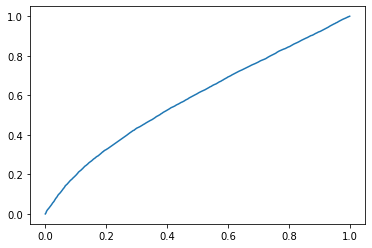

In [137]:
y_prob_nn = model.predict(X_test_scaled).flatten()
roc_auc_nn = roc_auc_score(y_test, y_prob_nn)
print("Neural Network AUC-ROC:", roc_auc_nn)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_nn)
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')

---
# Q2: Can we predict the hot spots of severe injuries in crashes based on geographical location?

In [139]:
df = pd.read_csv("Traffic_Crashes.csv")

df = df.dropna(subset=["LATITUDE", "LONGITUDE", "MOST_SEVERE_INJURY"])
df = df[(df["LATITUDE"] > 0) & (df["LONGITUDE"] < 0)]  # Valid latitude/longitude check

severity_mapping = {
    "NO INDICATION OF INJURY": 0,
    "NONINCAPACITATING INJURY": 1,
    "INCAPACITATING INJURY": 2,
    "FATAL": 3
}
df["SEVERITY_LEVEL"] = df["MOST_SEVERE_INJURY"].map(severity_mapping)

locations = df[["LATITUDE", "LONGITUDE"]].values

---
## KNN Predictive Modeling

In [140]:
nbrs = NearestNeighbors(n_neighbors=20, algorithm="ball_tree").fit(locations)
distances, indices = nbrs.kneighbors(locations)

# crash density (inverse of mean distance to neighbors)
df["DENSITY"] = 1 / distances.mean(axis=1)

def plot_hotspots(df, title, severity_filter=None, top_n=50):
    if severity_filter is not None:
        df = df[severity_filter]
    
    # sort by density to find hotspots
    df = df.nlargest(top_n, "DENSITY")
    
    if df.empty:
        print(f"No data matches the filter for {title}")
        return

    chicago_map = folium.Map(location=[df["LATITUDE"].mean(), df["LONGITUDE"].mean()], zoom_start=11)
    
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=(row["LATITUDE"], row["LONGITUDE"]),
            radius=5,  # Fixed radius for visibility
            color="red" if row["SEVERITY_LEVEL"] >= 2 else "blue",
            fill=True,
            fill_color="red" if row["SEVERITY_LEVEL"] >= 2 else "blue",
            fill_opacity=0.6
        ).add_to(chicago_map)
    
    output_file = f"{title}.html"
    chicago_map.save(output_file)
    print(f"Map saved as {output_file}")

plot_hotspots(df, "High_Severity_Hotspots", severity_filter=(df["SEVERITY_LEVEL"] >= 2))
plot_hotspots(df, "Low_Severity_Hotspots", severity_filter=(df["SEVERITY_LEVEL"] <= 2))

/var/folders/qv/24rfc9sd64q3pt384r307xdw0000gn/T/ipykernel_35108/1638853823.py:5: RuntimeWarning: divide by zero encountered in divide
  df["DENSITY"] = 1 / distances.mean(axis=1)


Map saved as High_Severity_Hotspots.html
Map saved as Low_Severity_Hotspots.html


Note: We will include these html files in our submission- For ease of use, I combined them into one html file as well, but I did this by hand by adding all the data points of one plot into the other.